In [1]:
# Union des df : ratings et movies

# Packages
import dask.dataframe as dd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [43]:
import struct
print(struct.calcsize("P") * 8)


64


In [5]:
import psutil

# Obtenir les informations sur la mémoire
memory_info = psutil.virtual_memory()

# Afficher la mémoire totale, utilisée et disponible en GB
total_memory = memory_info.total / (1024 ** 3)
used_memory = memory_info.used / (1024 ** 3)
available_memory = memory_info.available / (1024 ** 3)

print(f'Mémoire Totale: {total_memory:.2f} GB')
print(f'Mémoire Utilisée: {used_memory:.2f} GB')
print(f'Mémoire Disponible: {available_memory:.2f} GB')

Mémoire Totale: 15.40 GB
Mémoire Utilisée: 6.94 GB
Mémoire Disponible: 8.47 GB


In [35]:
# Afficher les tailles des objets en mémoire en parcourant une copie des clés du dictionnaire
all_objects = sys._getframe().f_globals.copy()
for obj_name, obj in all_objects.items():
    print(f'{obj_name}: {sys.getsizeof(obj) / 1024**2:.2f} MB')

__name__: 0.00 MB
__doc__: 0.00 MB
__package__: 0.00 MB
__loader__: 0.00 MB
__spec__: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
_ih: 0.00 MB
_oh: 0.00 MB
_dh: 0.00 MB
In: 0.00 MB
Out: 0.00 MB
get_ipython: 0.00 MB
exit: 0.00 MB
quit: 0.00 MB
open: 0.00 MB
_: 0.01 MB
__: 0.01 MB
___: 0.00 MB
__session__: 0.00 MB
_i: 0.00 MB
_ii: 0.00 MB
_iii: 0.00 MB
_i1: 0.00 MB
dd: 0.00 MB
sys: 0.00 MB
pd: 0.00 MB
plt: 0.00 MB
sns: 0.00 MB
px: 0.00 MB
_i2: 0.00 MB
json: 0.00 MB
getpass: 0.00 MB
hashlib: 0.00 MB
import_pandas_safely: 0.00 MB
__pandas: 0.00 MB
is_data_frame: 0.00 MB
dataframe_columns: 0.00 MB
dtypes_str: 0.00 MB
dataframe_hash: 0.00 MB
get_dataframes: 0.00 MB
_2: 0.00 MB
_i3: 0.00 MB
genome_scores_path: 0.00 MB
genome_tags_path: 0.00 MB
links_path: 0.00 MB
movies_path: 0.00 MB
ratings_path: 0.00 MB
tags_path: 0.00 MB
_i4: 0.00 MB
_4: 0.00 MB
_i5: 0.00 MB
psutil: 0.00 MB
memory_info: 0.00 MB
total_memory: 0.00 MB
used_memory: 0.00 MB
available_memory: 0.00 MB
_i6: 0.00 MB
_6: 0.0

In [55]:
# Libérer du mémoire 
import gc

# Supprimer l'objet volumineux
del ratings_movies_links2

# Forcer le garbage collector à libérer la mémoire
gc.collect()

0

In [3]:
# Chemin des fichiers
genome_scores_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/genome_scores.feather'
genome_tags_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/genome_tags.feather'
links_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/df_links.feather'
movies_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/movies.feather'
ratings_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/ratings.feather'
tags_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/df_tags.feather'

In [5]:
# Lire et fusionner directement movies et links
movies_links = dd.merge(
    pd.read_feather(movies_path),
    pd.read_feather(links_path),
    how='left',
    on='movieId'
)

# Première visualisation
print(len(movies_links))
movies_links.head()

27278


,movieId,title,genres,title_name,release_year,(no genres listed),Action,Adventure,Animation,Children,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,0,0,1,1,1,...,0,0,0,0,0,0,0,0,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995,0,0,1,0,1,...,0,0,0,0,0,0,0,0,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,0,0,0,0,0,...,0,0,0,1,0,0,0,0,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995,0,0,0,0,0,...,0,0,0,1,0,0,0,0,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,113041,11862.0


In [7]:
# Lire et fusionner directement movies_links et ratings
ratings_movies_links = dd.merge(
    pd.read_feather(ratings_path),
    movies_links,
    how='left',
    on=['movieId']
)

# Première visualisation
print(len(ratings_movies_links))
ratings_movies_links.head()

20000263


,userId,movieId,rating,timestamp,timestamp_readable,date_rating,time_rating,year_rating,month_rating,title,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,imdbId,tmdbId
0,1,2,3.5,1112486027,2005-04-02 23:53:47,2005-04-02,23:53:47,2005,4,Jumanji (1995),...,0,0,0,0,0,0,0,0,113497,8844.0
1,1,29,3.5,1112484676,2005-04-02 23:31:16,2005-04-02,23:31:16,2005,4,"City of Lost Children, The (Cité des enfants p...",...,0,0,1,0,1,0,0,0,112682,902.0
2,1,32,3.5,1112484819,2005-04-02 23:33:39,2005-04-02,23:33:39,2005,4,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),...,0,0,1,0,1,1,0,0,114746,63.0
3,1,47,3.5,1112484727,2005-04-02 23:32:07,2005-04-02,23:32:07,2005,4,Seven (a.k.a. Se7en) (1995),...,0,0,1,0,0,1,0,0,114369,807.0
4,1,50,3.5,1112484580,2005-04-02 23:29:40,2005-04-02,23:29:40,2005,4,"Usual Suspects, The (1995)",...,0,0,1,0,0,1,0,0,114814,629.0


In [146]:
       ### Pour libèrer du mémoire : Sauvegarde du DataFrame 'ratings_movies_links'

# Vérifier l'utilisation de la mémoire en bytes
memory_usage_bytes = ratings_movies_links.memory_usage(deep=True).sum()

# Convertir en mégaoctets (MB)
memory_usage_MB = memory_usage_bytes / 1024**2

print(f'Le DataFrame ratings_movies_links pèse environ {memory_usage_MB:.2f} MB en mémoire.')

# Sauvegarder le fichier
ratings_movies_links.to_feather(r'C:\Users\anacv\OneDrive\Documentos\Data Scientist\00. Projet\Data\DataFrames travaillés\0. Unions\ratings_movies_links.feather')

# Supprimer le DataFrame
#import gc
#del ratings_movies_links
#gc.collect()

Le DataFrame ratings_movies_links pèse environ 2554.89 MB en mémoire.


In [148]:
ratings_movies_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   userId        int64         
 1   movieId       int64         
 2   rating        float64       
 3   date_rating   datetime64[ns]
 4   time_rating   string        
 5   year_rating   int32         
 6   month_rating  int32         
 7   genres        string        
 8   title_name    string        
 9   release_year  Int64         
 10  imdbId        int64         
 11  tmdbId        float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(2), int64(3), string(3)
memory usage: 2.5 GB


In [ ]:
# Analyses

In [31]:
print(ratings_movies_links.dtypes)

userId                          int64
movieId                         int64
rating                        float64
timestamp                       int64
timestamp_readable     datetime64[ns]
date_rating            datetime64[ns]
time_rating           string[pyarrow]
year_rating                     int32
month_rating                    int32
title                 string[pyarrow]
genres                string[pyarrow]
title_name            string[pyarrow]
release_year                    Int64
(no genres listed)              int64
Action                          int64
Adventure                       int64
Animation                       int64
Children                        int64
Comedy                          int64
Crime                           int64
Documentary                     int64
Drama                           int64
Fantasy                         int64
Film-Noir                       int64
Horror                          int64
IMAX                            int64
Musical     

Text(0.5, 1.0, 'Heatmap des Corrélations')

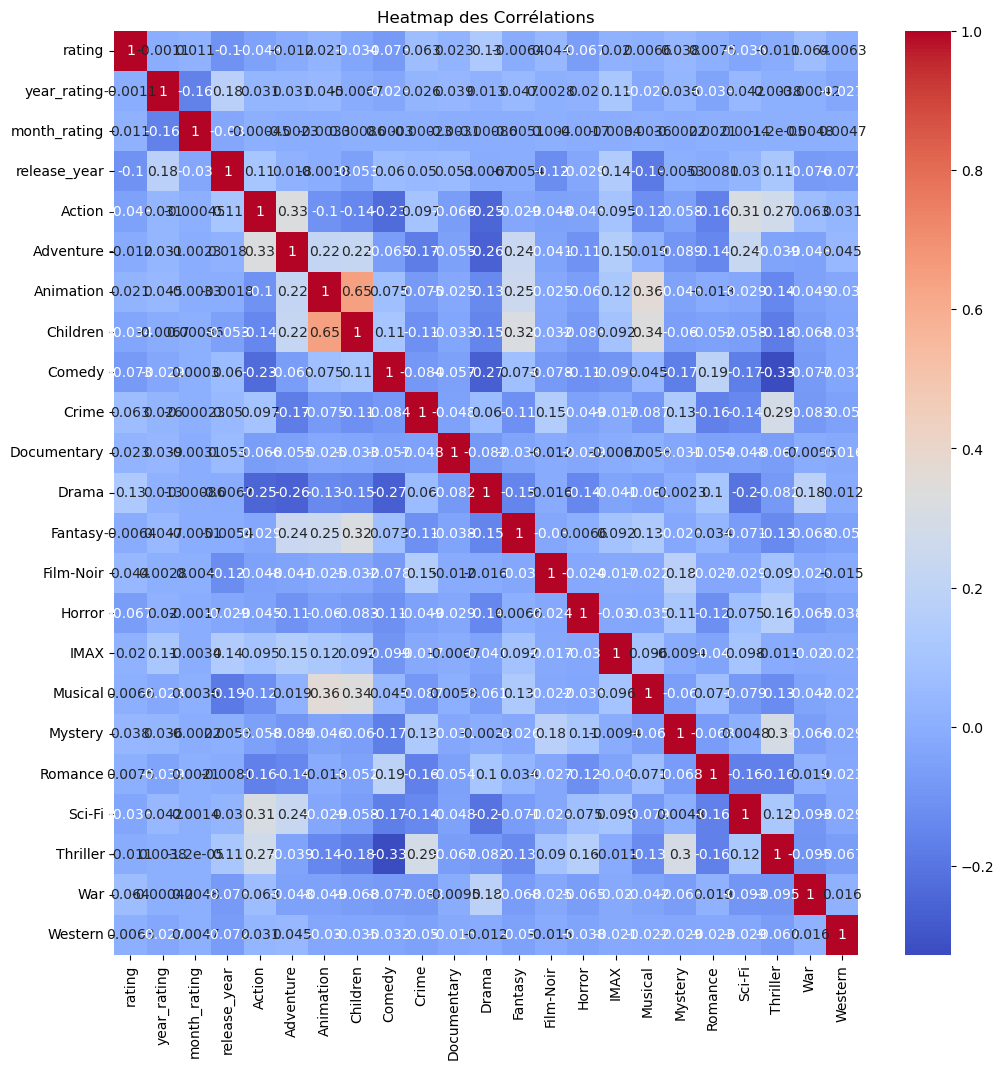

In [35]:
# Liste des colonnes à éliminer
colonnes_a_eliminer = ['userId', 'movieId', 'timestamp', 'timestamp_readable', 'time_rating', 'title', 'genres', '(no genres listed)', 'imdbId', 
                        'tmdbId']

# Créer un nouveau DataFrame en éliminant les colonnes spécifiées
ratings_movies_links2 = ratings_movies_links.drop(columns=colonnes_a_eliminer)

# Pour convertir en DataFrame pandas (nécessaire pour seaborn)
ratings_movies_links2 = ratings_movies_links2.compute()

# Sélection des variables quantitatives et calcul des corrélations
cor = ratings_movies_links2.select_dtypes(include='number').corr()

# Création du heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm")
plt.title('Heatmap des Corrélations')



AttributeError: module 'matplotlib.pyplot' has no attribute 'shox'

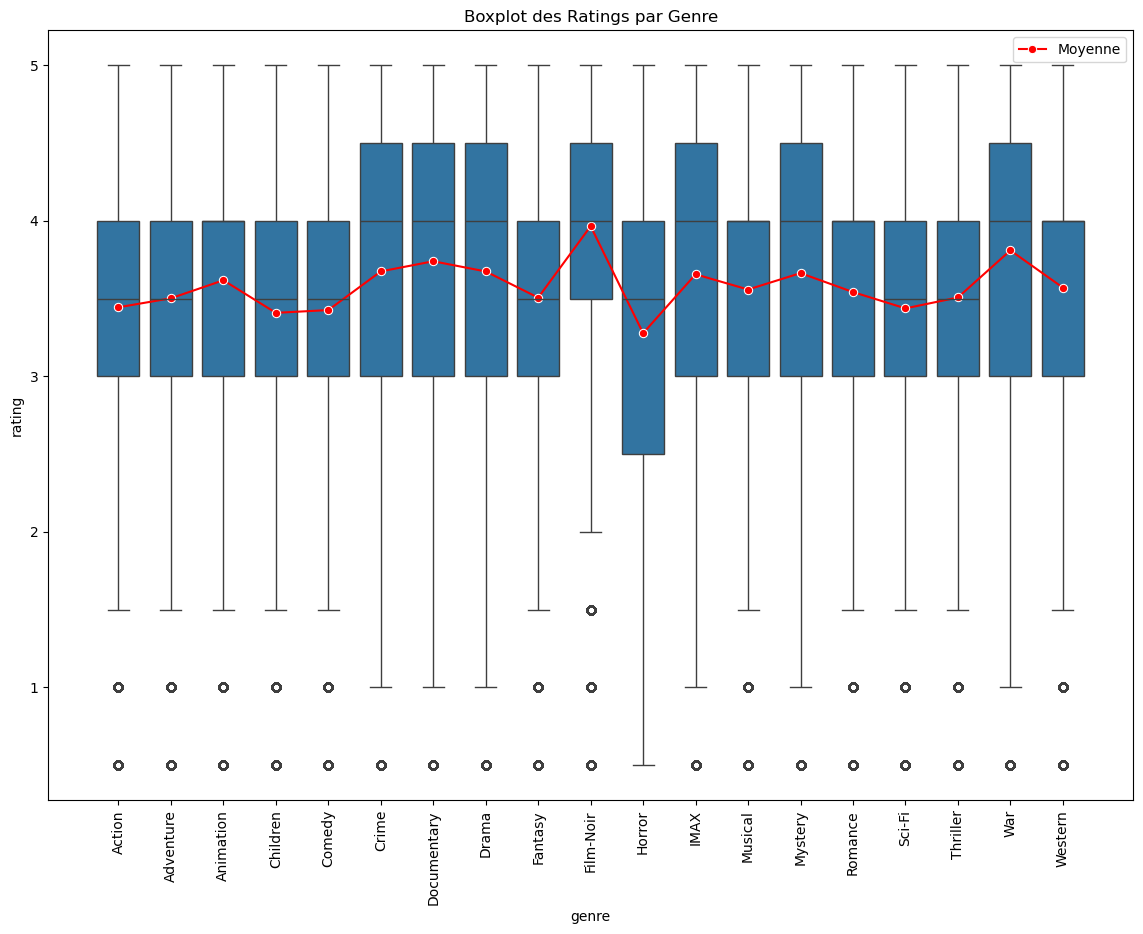

In [19]:
# Convertir en DataFrame pandas (nécessaire pour seaborn)
#ratings_movies_links = ratings_movies_links.compute()

# Fusionner les colonnes genres en une seule colonne pour le boxplot
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 
            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Étirer les données pour avoir une seule colonne 'genre' et une colonne 'rating'
df_melted = ratings_movies_links.melt(id_vars=['rating'], value_vars=genres, var_name='genre', value_name='value')
df_filtered = df_melted[df_melted['value'] == 1]

# Calculer la moyenne des ratings par genre
mean_ratings = df_filtered.groupby('genre')['rating'].mean()

# Créer le boxplot
plt.figure(figsize=(14,10))
sns.boxplot(x='genre', y='rating', data=df_filtered)

# Ajouter la courbe de la moyenne des ratings par genre
sns.lineplot(x=mean_ratings.index, y=mean_ratings.values, color='red', marker='o', label='Moyenne')

# Afficher le graphique
plt.xticks(rotation=90)
plt.title('Boxplot des Ratings par Genre')
plt.legend()
plt.show()


### Interprètation 
''' 
La moyenne générale des ratings pour les films est autour de 3.5.
Les films-noirs se distinguent comme étant les mieux notés en moyenne parmi tous les genres, suggérant une forte appréciation de la part des 
spectateurs.
En deuxième place, on retrouve les films de guerre, qui bénéficient également de ratings élevés, indiquant une perception positive de ce genre par 
le public.
Les films d'horreur tendent à recevoir les pires ratings, suivis par les films de comédie et ceux destinés aux enfants (Children).

Les films d'horreur montrent une grande variabilité dans les ratings, reflétant des opinions très partagées et des expériences spectatorielles 
contrastées au sein de ce genre.

'''


In [31]:
# Vérifier les doublons dans la concaténation de movieId et userId
# Nous devons convertir en DataFrame pandas pour cette opération
#ratings_movies_links_pd = ratings_movies_links.compute()
doublons = ratings_movies_links.duplicated(subset=['movieId', 'userId'])

# Afficher les lignes avec des doublons
df_doublons = ratings_movies_links[doublons]
print(df_doublons)

# Vérifier si des doublons existent
if not df_doublons.empty:
    print("Il y a des doublons dans la concaténation de movieId et userId.")
else:
    print("Il n'y a pas de doublons dans la concaténation de movieId et userId.")


Empty DataFrame
Columns: [userId, movieId, rating, timestamp, timestamp_readable, date_rating, time_rating, year_rating, month_rating, title, genres, title_name, release_year, (no genres listed), Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, IMAX, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, imdbId, tmdbId]
Index: []

[0 rows x 35 columns]
Il n'y a pas de doublons dans la concaténation de movieId et userId.


In [ ]:
# Fonction pour calculer le pourcentage et la fréquence de 1
def calculate_percentage_and_frequency_1(series):
    counts = series.value_counts()
    percentage_1 = counts.get(1, 0) / series.size * 100
    frequency_1 = counts.get(1, 0)
    return pd.Series({'Pourcentage de 1': percentage_1, 'Fréquence de 1': frequency_1})

# Appliquer la fonction à chaque colonne dichotomisée
results = genres_movies.apply(calculate_percentage_and_frequency_1).T

# Trier les résultats par pourcentage de 1 de majeur au mineur
sorted_results = results.sort_values(by='Pourcentage de 1', ascending=False)

C:\Users\anacv\AppData\Local\Temp\ipykernel_4476\85252514.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='percentage', data=frequencies_df, palette='viridis')


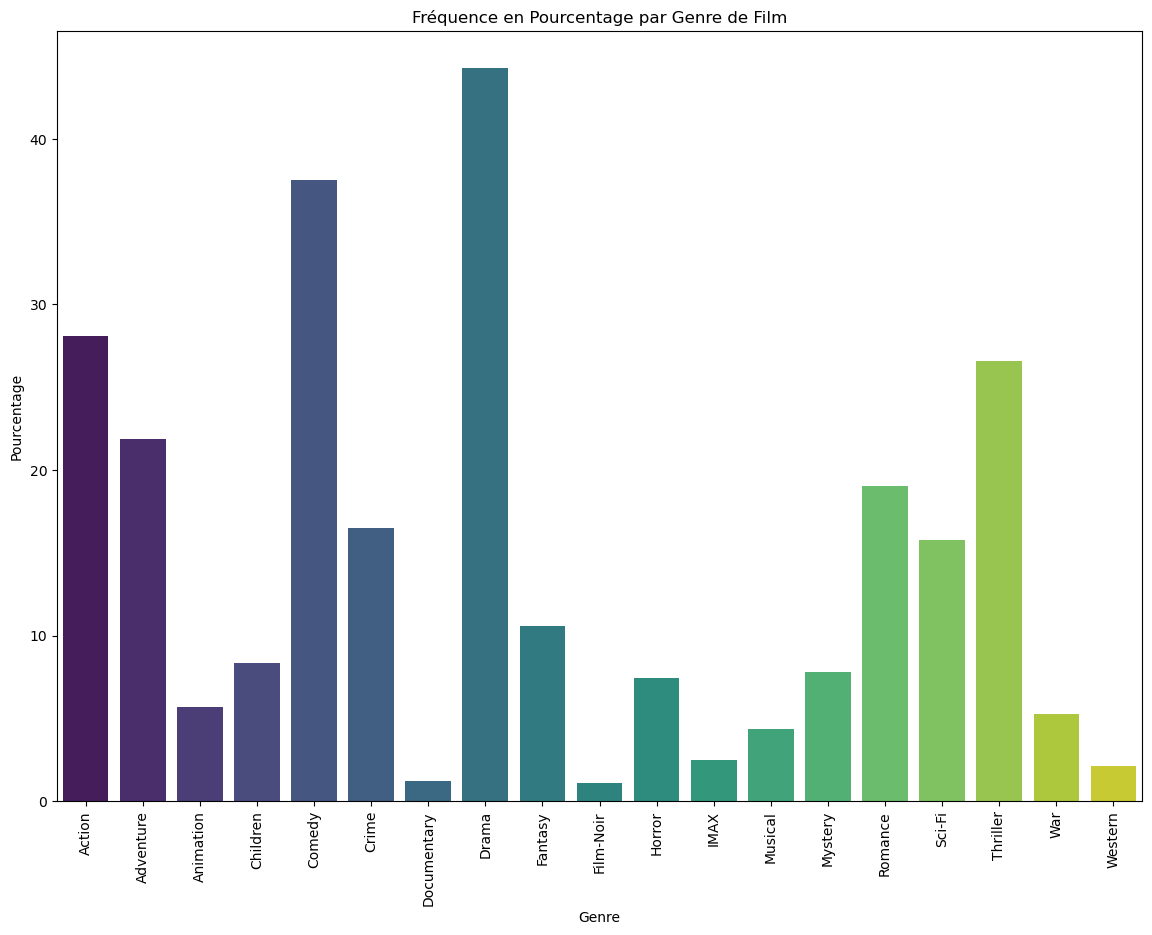

In [13]:
Graphique de 

# Définir les genres
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 
            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculer les fréquences en pourcentage par genre en utilisant Dask
def calculate_frequencies(df, genres):
    total_interactions = df.shape[0].compute()
    frequencies = {}
    for genre in genres:
        genre_sum = df[genre].sum().compute()
        frequencies[genre] = (genre_sum / total_interactions) * 100
    return frequencies

# Calculer les fréquences
frequencies = calculate_frequencies(ratings_movies_links, genres)

# Convertir en DataFrame pandas pour visualisation
frequencies_df = pd.DataFrame(list(frequencies.items()), columns=['genre', 'percentage'])

# Créer le graphique de la fréquence en pourcentage
plt.figure(figsize=(14,10))
sns.barplot(x='genre', y='percentage', data=frequencies_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Fréquence en Pourcentage par Genre de Film')
plt.xlabel('Genre')
plt.ylabel('Pourcentage')
plt.show()


#### Interprétation 

''' Les genres qui sont plus présentes sont drama, comedy, action et thriller.
Les genres qui ont la tendance d'avoir le meilleur rating (film-noir et war) ne sont pas représentatifs au niveau de fréquence 
'''

In [15]:
# Fonction pour afficher les valeurs uniques avec leur fréquence et pourcentage
def display_unique_values_with_stats(df, columns):
    for col in columns:
        unique_values = df[col].value_counts()
        percentage_values = df[col].value_counts(normalize=True) * 100
        df_unique = pd.DataFrame({'Fréquence': unique_values, 'Pourcentage': percentage_values})
        df_unique.index.name = col
        print(df_unique)
        print('\n')

# Appeler la fonction avec le DataFrame et les colonnes souhaitées
display_unique_values_with_stats(ratings_movies_links, ['movieId', 'title', 'genres', 'title_name', 'release_year', '(no genres listed)', 'Action', 'Adventure', 
                                            'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 
                                            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])


         Fréquence  Pourcentage
movieId                        
0            49695     0.248472
1            22243     0.111214
2            12735     0.063674
3             2756     0.013780
4            12161     0.060804
...            ...          ...
26739            1     0.000005
26740            1     0.000005
26741            1     0.000005
26742            1     0.000005
26743            1     0.000005

[26744 rows x 2 columns]


       Fréquence  Pourcentage
title                        
0            155     0.000775
1              3     0.000015
2             24     0.000120
3             39     0.000195
4             55     0.000275
...          ...          ...
26724          4     0.000020
26725          1     0.000005
26726          2     0.000010
26727          1     0.000005
26728          1     0.000005

[26729 rows x 2 columns]


        Fréquence  Pourcentage
genres                        
0             361     0.001805
1           34198     0.170988
2          113

C:\Users\anacv\AppData\Local\Temp\ipykernel_4476\4137030283.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='frequency', data=freq_by_genre_df, palette='viridis')


Text(0, 0.5, 'Fréquence')

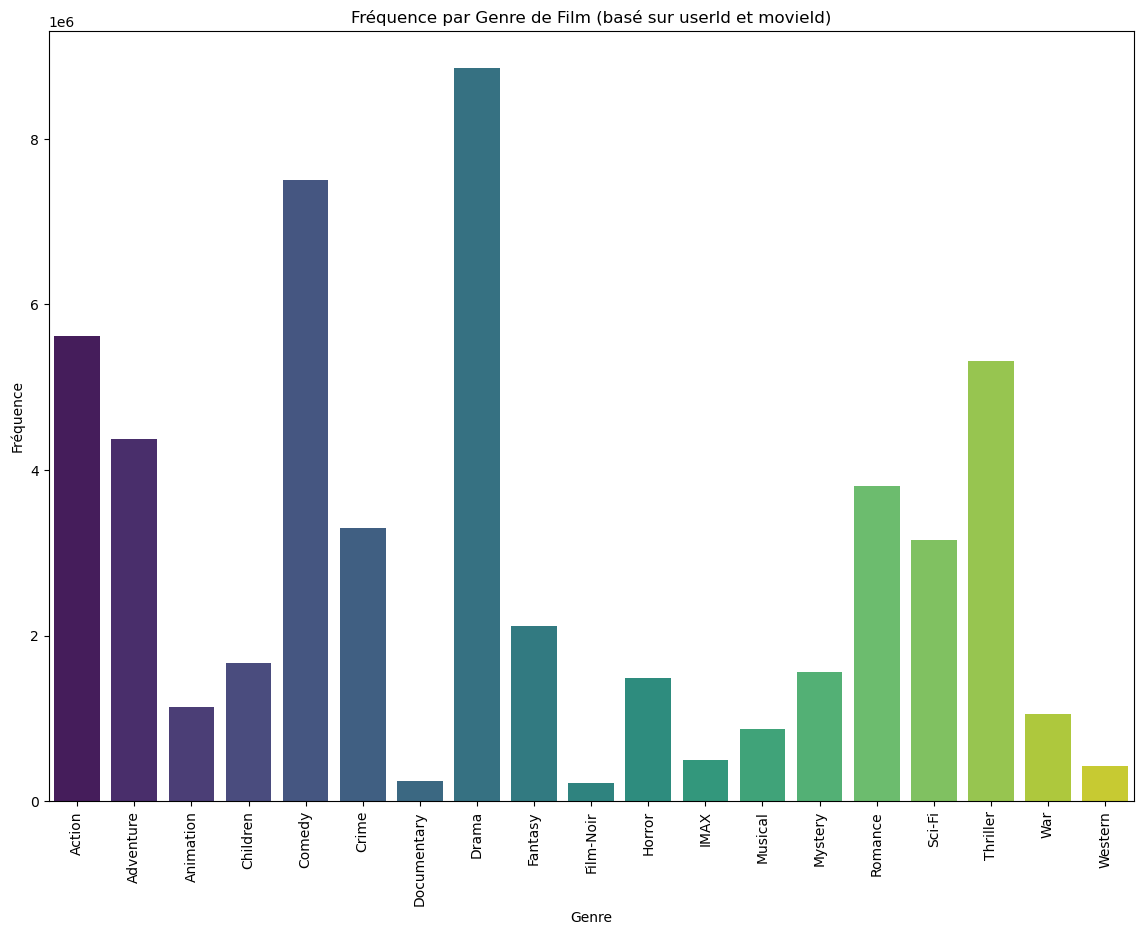

In [9]:
# Convertir en DataFrame pandas (nécessaire pour seaborn si ce n'est pas déjà fait)
#ratings_movies_links = ratings_movies_links.compute()

# Colonnes genres en une seule colonne pour la fréquence
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 
            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Concaténer les genres directement dans un DataFrame Dask
def compute_genre_frequency(df, genres):
    frequency = {}
    for genre in genres:
        genre_count = df[df[genre] == 1].shape[0].compute()
        frequency[genre] = genre_count
    return frequency

# Calculer la fréquence des genres
freq_by_genre = compute_genre_frequency(ratings_movies_links, genres)

# Convertir en DataFrame pandas pour visualisation
freq_by_genre_df = pd.DataFrame(list(freq_by_genre.items()), columns=['genre', 'frequency'])

# Créer le graphique de fréquence
plt.figure(figsize=(14,10))
sns.barplot(x='genre', y='frequency', data=freq_by_genre_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Fréquence par Genre de Film (basé sur userId et movieId)')
plt.xlabel('Genre')
plt.ylabel('Fréquence')

#### Interprétation 

''' Les genres qui sont plus présentes sont drama, comedy, action et thriller.
Les genres qui ont la tendance d'avoir le meilleur rating (film-noir et war) ne sont pas représentatifs au niveau de fréquence







Text(0.5, 1.0, 'Heatmap des Corrélations')

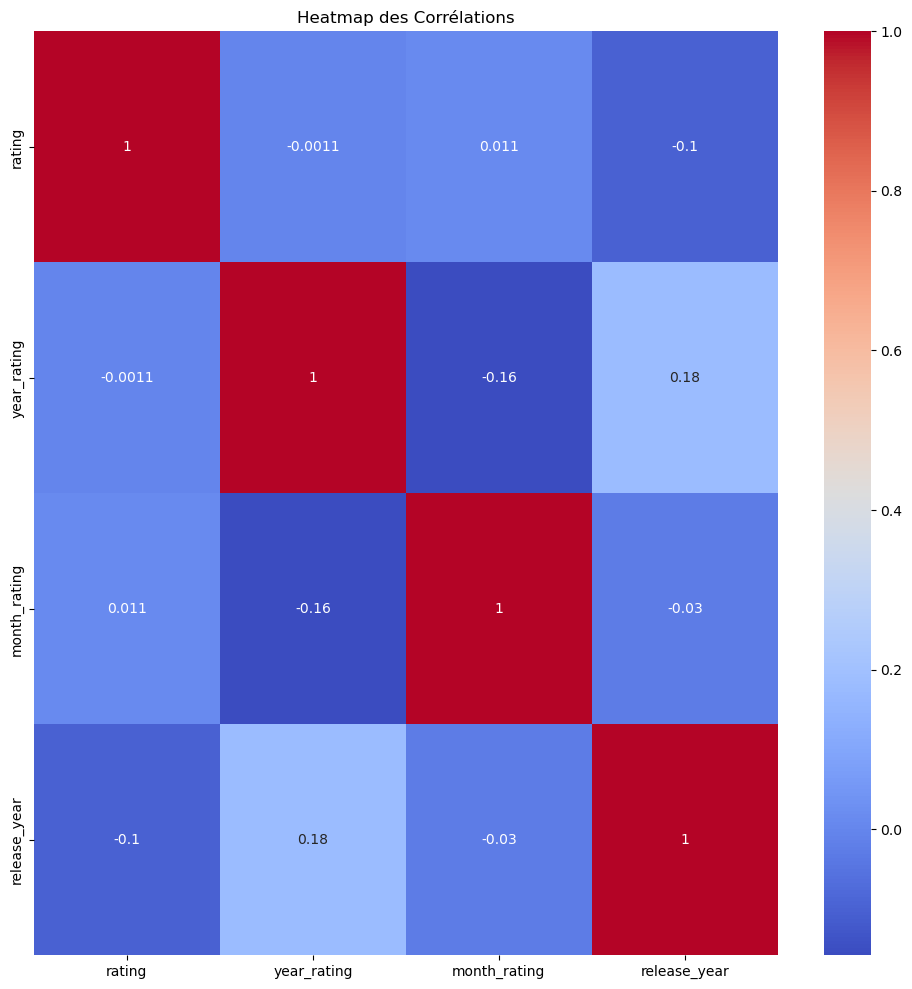

In [41]:
# Liste des colonnes à éliminer sans dichotomisation
colonnes_a_eliminer = ['userId', 'movieId', 'timestamp', 'timestamp_readable', 'time_rating', 'title', '(no genres listed)', 'imdbId', 
                        'tmdbId', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                        'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Créer un nouveau DataFrame en éliminant les colonnes spécifiées
ratings_movies_links3 = ratings_movies_links.drop(columns=colonnes_a_eliminer)

# Pour convertir en DataFrame pandas (nécessaire pour seaborn)
ratings_movies_links3 = ratings_movies_links3.compute()

# Sélection des variables quantitatives et calcul des corrélations
cor = ratings_movies_links3.select_dtypes(include='number').corr()

# Création du heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm")
plt.title('Heatmap des Corrélations')

In [43]:
print(ratings_movies_links.dtypes)

userId                          int64
movieId                         int64
rating                        float64
timestamp                       int64
timestamp_readable     datetime64[ns]
date_rating            datetime64[ns]
time_rating           string[pyarrow]
year_rating                     int32
month_rating                    int32
title                 string[pyarrow]
genres                string[pyarrow]
title_name            string[pyarrow]
release_year                    Int64
(no genres listed)              int64
Action                          int64
Adventure                       int64
Animation                       int64
Children                        int64
Comedy                          int64
Crime                           int64
Documentary                     int64
Drama                           int64
Fantasy                         int64
Film-Noir                       int64
Horror                          int64
IMAX                            int64
Musical     

In [21]:

# Lire et fusionner directement ratings_movies_links et tags
ratings_movies_links_tags = dd.merge(
    ratings_movies_links,
    pd.read_feather(tags_path),
    how='left',
    on=['movieId', 'userId']
)

# Première visualisation
print(len(ratings_movies_links_tags))
ratings_movies_links_tags.head()

20265625


,userId,movieId,rating,timestamp_x,timestamp_readable_x,date_rating,time_rating,year_rating,month_rating,title,...,Western,imdbId,tmdbId,tag,timestamp_y,timestamp_readable_y,date_tag,time_tag,year_tag,month_tag
0,1,2,3.5,1112486027,2005-04-02 23:53:47,2005-04-02,23:53:47,2005,4,Jumanji (1995),...,0,113497,8844.0,<NA>,NaN,NaT,NaT,<NA>,NaN,NaN
1,1,29,3.5,1112484676,2005-04-02 23:31:16,2005-04-02,23:31:16,2005,4,"City of Lost Children, The (Cité des enfants p...",...,0,112682,902.0,<NA>,NaN,NaT,NaT,<NA>,NaN,NaN
2,1,32,3.5,1112484819,2005-04-02 23:33:39,2005-04-02,23:33:39,2005,4,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),...,0,114746,63.0,<NA>,NaN,NaT,NaT,<NA>,NaN,NaN
3,1,47,3.5,1112484727,2005-04-02 23:32:07,2005-04-02,23:32:07,2005,4,Seven (a.k.a. Se7en) (1995),...,0,114369,807.0,<NA>,NaN,NaT,NaT,<NA>,NaN,NaN
4,1,50,3.5,1112484580,2005-04-02 23:29:40,2005-04-02,23:29:40,2005,4,"Usual Suspects, The (1995)",...,0,114814,629.0,<NA>,NaN,NaT,NaT,<NA>,NaN,NaN


In [25]:
print(ratings_movies_links_tags.dtypes)

userId                            int64
movieId                           int64
rating                          float64
timestamp_x                       int64
timestamp_readable_x     datetime64[ns]
date_rating              datetime64[ns]
time_rating             string[pyarrow]
year_rating                       int32
month_rating                      int32
title                   string[pyarrow]
genres                  string[pyarrow]
title_name              string[pyarrow]
release_year                      Int64
(no genres listed)                int64
Action                            int64
Adventure                         int64
Animation                         int64
Children                          int64
Comedy                            int64
Crime                             int64
Documentary                       int64
Drama                             int64
Fantasy                           int64
Film-Noir                         int64
Horror                            int64


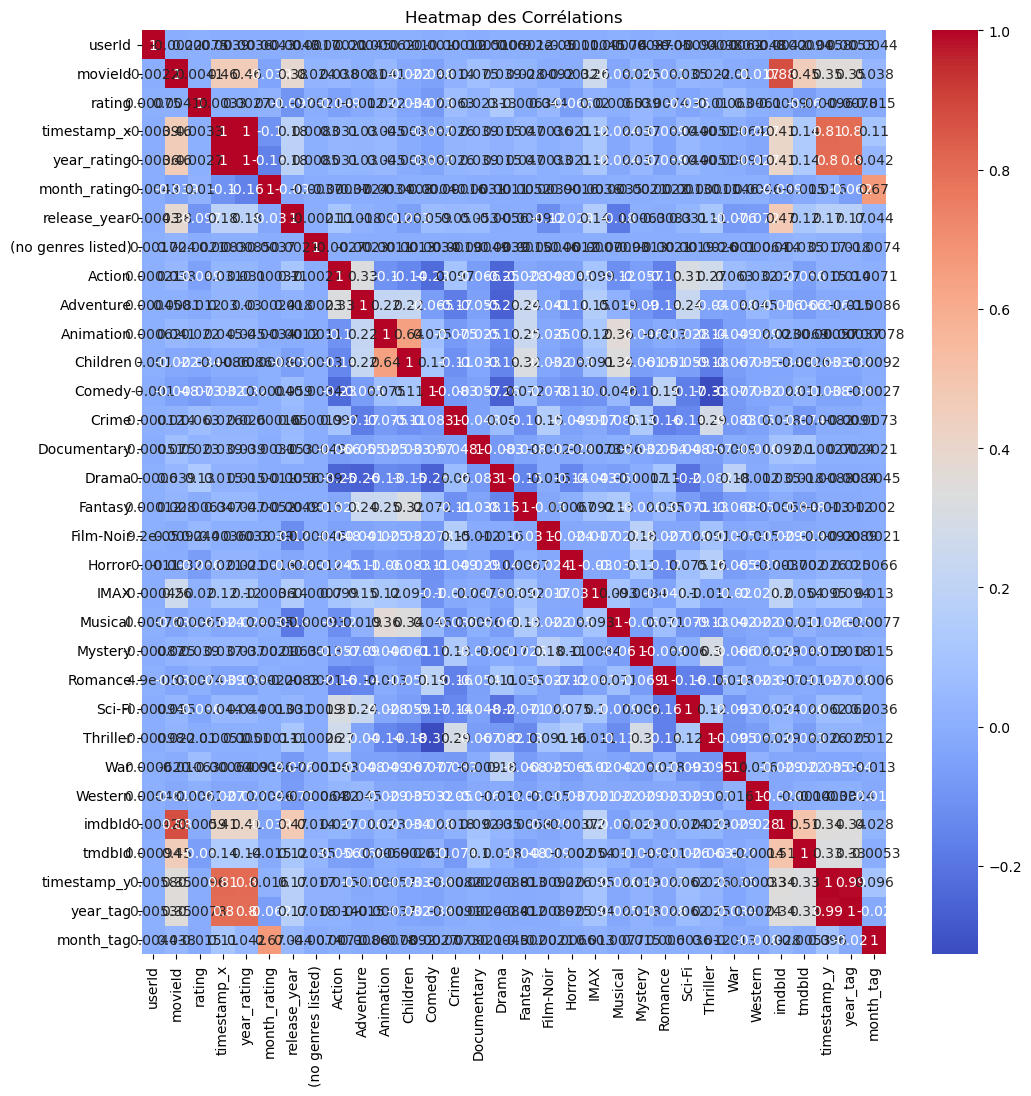

In [27]:
# Convertir en DataFrame pandas (nécessaire pour seaborn)
ratings_movies_links_tags = ratings_movies_links_tags.compute()

# Sélection des variables quantitatives et calcul des corrélations
cor = ratings_movies_links_tags.select_dtypes(include='number').corr()

# Création du heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm")
plt.title('Heatmap des Corrélations')
plt.show()

In [9]:
# Elimination des variables dichotomisés et de la colonne avec title et release year au même temps

# Ne garder que les colonnes spécifiques
ratings_movies_links = ratings_movies_links[['userId', 'movieId', 'rating', 'date_rating',  'time_rating', 'year_rating', 'month_rating', 'genres', 
'title_name', 'release_year', 'imdbId', 'tmdbId']].compute()

ratings_movies_links.info()
ratings_movies_links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   userId        int64         
 1   movieId       int64         
 2   rating        float64       
 3   date_rating   datetime64[ns]
 4   time_rating   string        
 5   year_rating   int32         
 6   month_rating  int32         
 7   genres        string        
 8   title_name    string        
 9   release_year  Int64         
 10  imdbId        int64         
 11  tmdbId        float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(2), int64(3), string(3)
memory usage: 2.5 GB


,userId,movieId,rating,date_rating,time_rating,year_rating,month_rating,genres,title_name,release_year,imdbId,tmdbId
0,1,2,3.5,2005-04-02,23:53:47,2005,4,Adventure|Children|Fantasy,Jumanji,1995,113497,8844.0
1,1,29,3.5,2005-04-02,23:31:16,2005,4,Adventure|Drama|Fantasy|Mystery|Sci-Fi,"City of Lost Children, The (Cité des enfants p...",1995,112682,902.0
2,1,32,3.5,2005-04-02,23:33:39,2005,4,Mystery|Sci-Fi|Thriller,Twelve Monkeys (a.k.a. 12 Monkeys),1995,114746,63.0
3,1,47,3.5,2005-04-02,23:32:07,2005,4,Mystery|Thriller,Seven (a.k.a. Se7en),1995,114369,807.0
4,1,50,3.5,2005-04-02,23:29:40,2005,4,Crime|Mystery|Thriller,"Usual Suspects, The",1995,114814,629.0


In [11]:
# Missing percentage
missing_percentage = ratings_movies_links.isnull().mean()*100
missing_columns = missing_percentage[missing_percentage > 0]
print ('missing_columns_prctg :', missing_columns)
print('\n')



missing_columns_prctg : release_year    0.007260
tmdbId          0.062909
dtype: float64




In [13]:
ratings_movies_links[ratings_movies_links.duplicated()]

# Pas de doublons

,userId,movieId,rating,date_rating,time_rating,year_rating,month_rating,genres,title_name,release_year,imdbId,tmdbId


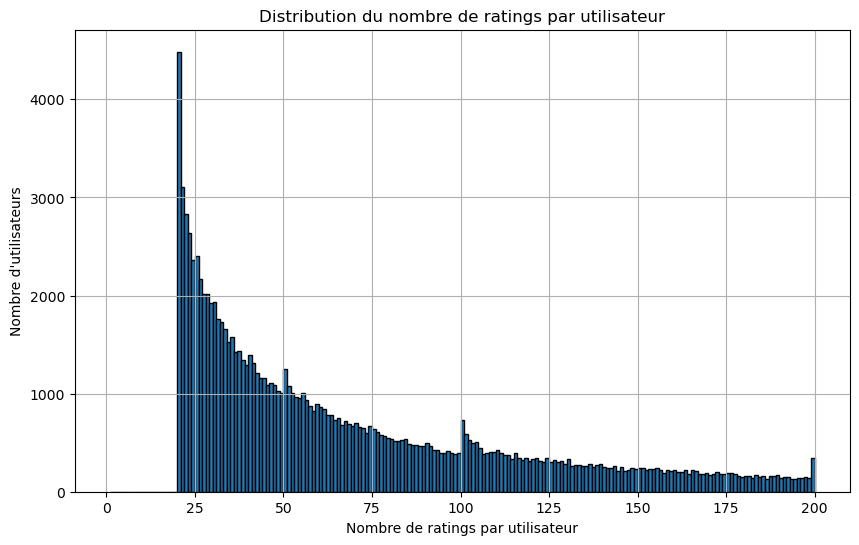

In [15]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links['userId'].value_counts()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=range(1, 201), edgecolor='black')  # Limité à 200 pour une meilleure visualisation
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution du nombre de ratings par utilisateur')
plt.grid(True)
plt.show()

In [24]:
# Verif  total des usersId... 
user_ratings_count[(user_ratings_count < 20000)].count()

138493

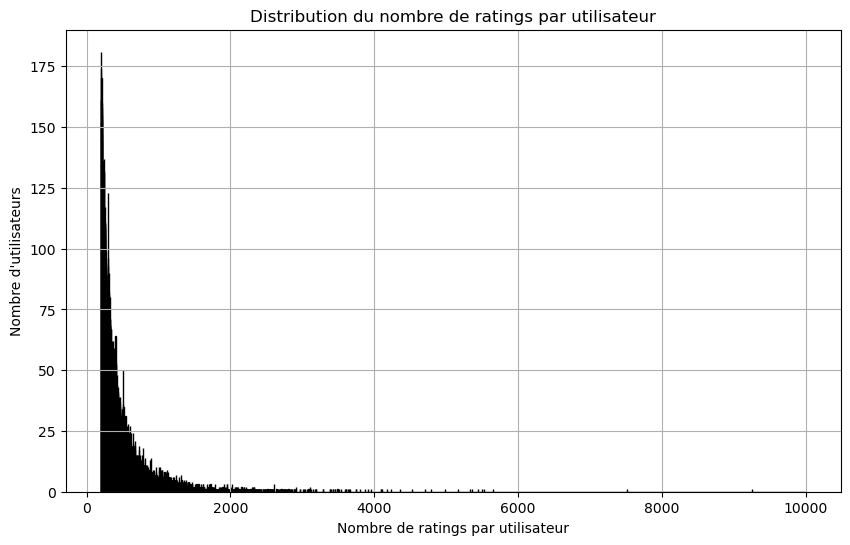

In [16]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links['userId'].value_counts()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=range(201, 10000), edgecolor='black')  # Limité à 200 pour une meilleure visualisation
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution du nombre de ratings par utilisateur')
plt.grid(True)
plt.show()

In [23]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links.groupby('userId').size()

# Obtenir le minimum et le maximum de ratings par utilisateur
min_ratings = user_ratings_count.min()
max_ratings = user_ratings_count.max()

# Afficher les résultats
print(f"Nombre minimum de ratings par un utilisateur: {min_ratings}")
print(f"Nombre maximum de ratings par un utilisateur: {max_ratings}")

Nombre minimum de ratings par un utilisateur: 20
Nombre maximum de ratings par un utilisateur: 9254


In [142]:
# Analyse de combien des usersIds resteraient si on sélectionne éliminer certaines par quantité de rating

# Sachant qu'on a en total dans la table movielens 138 493 userids

def analyze_ratings1(user_ratings_count, ratings_movies_links, min_ratings, max_ratings):
    # Filtrer les utilisateurs ayant donné entre min_ratings et max_ratings
    selected_users = user_ratings_count[(user_ratings_count >= min_ratings) & (user_ratings_count <= max_ratings)]

    # Rappel des utilisateurs totaux
    unique_userIds = ratings_movies_links['userId'].nunique()
    print(f'Rappel de combien des userIds la base de données présente : {unique_userIds}')

    # Nombre d'utilisateurs ayant donné entre min_ratings et max_ratings
    num_users = selected_users.count()
    print(f"Nombre des users ont >= {min_ratings} ratings et <= {max_ratings} ratings : {num_users}")

    # Pourcentage des userIds qui restent 
    percent_remaining_userIds = (num_users/unique_userIds) * 100
    print(f"% des usersids restantes : {percent_remaining_userIds:.2f}%")
    
    # Nombre de lignes à éliminer
    num_rows_to_remove = selected_users.sum()
    print(f"Nombre des lignes qui seraient éliminées : {num_rows_to_remove}")
    
    # Nombre de lignes restantes
    num_rows_remaining = len(ratings_movies_links) - num_rows_to_remove
    print(f"Nombre des lignes restantes : {num_rows_remaining}")
    
    # Pourcentage des lignes restantes
    percent_remaining = (1 - (num_rows_to_remove / len(ratings_movies_links))) * 100
    print(f"% des lignes restantes : {percent_remaining:.2f}%")
    
    return num_users, unique_userIds, percent_remaining_userIds, num_rows_to_remove, num_rows_remaining, percent_remaining

# Appel de la fonction avec les valeurs spécifiques
user_ratings_count = ratings_movies_links.groupby('userId').size()
analyze_ratings1(user_ratings_count, ratings_movies_links, 500, 2000)


Rappel de combien des userIds la base de données présente : 138493
Nombre des users ont >= 500 ratings et <= 2000 ratings : 7236
% des usersids restantes : 5.22%
Nombre des lignes qui seraient éliminées : 5884821
Nombre des lignes restantes : 14115442
% des lignes restantes : 70.58%


(7236, 138493, 5.224812806423429, 5884821, 14115442, 70.57628192189273)

In [144]:
# Analyse de films resteraient 

# Calcul des nombre des films qui restent 
def analyze_ratings2(user_ratings_count, ratings_movies_links, min_ratings, max_ratings):
    # Filtrer les utilisateurs ayant donné entre min_ratings et max_ratings
    selected_users = user_ratings_count[(user_ratings_count >= min_ratings) & (user_ratings_count <= max_ratings)].index
    
    # Filtrer les données pour ces utilisateurs
    filtered_ratings = ratings_movies_links[ratings_movies_links['userId'].isin(selected_users)]
    
    # Compter les films uniques notés par ces utilisateurs
    unique_films_count = filtered_ratings['imdbId'].nunique()
    print(f"Nombre de films uniques notés par des utilisateurs ayant donné entre {min_ratings} et {max_ratings} notes : {unique_films_count}")
    
    # Rappel de combien de films la base de données totaux
    imdbId_uniques = ratings_movies_links['imdbId'].nunique()
    print(f'Rappel de combien des films la base de données présente : {imdbId_uniques}')

     # Pourcentage des films restantes
    percent_remaining = (unique_films_count / imdbId_uniques) * 100
    print(f"% des films restantes : {percent_remaining:.2f}%")
    
    return unique_films_count, imdbId_uniques, percent_remaining

# Appel de la fonction avec les valeurs spécifiques
user_ratings_count = ratings_movies_links.groupby('userId').size()
analyze_ratings2(user_ratings_count, ratings_movies_links, 500, 2000)


Nombre de films uniques notés par des utilisateurs ayant donné entre 500 et 2000 notes : 23080
Rappel de combien des films la base de données présente : 26744
% des films restantes : 86.30%


(23080, 26744, 86.29973078073586)

In [112]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links.groupby('userId').size()

# Filtrer les utilisateurs ayant donné entre 500 et 700 notes
selected_users = user_ratings_count[(user_ratings_count >= 500) & (user_ratings_count <= 700)].index

# Filtrer les données pour ces utilisateurs
filtered_ratings = ratings_movies_links[ratings_movies_links['userId'].isin(selected_users)]

# Compter les films uniques notés par ces utilisateurs
unique_films_count = filtered_ratings['imdbId'].nunique()

# Afficher le résultat
print(f"Nombre de films uniques notés par des utilisateurs ayant donné entre 500 et 700 notes : {unique_films_count}")

# Rappel de combien des films la base de données a : 
imdbId_uniques = ratings_movies_links['imdbId'].nunique()
print('Rappel de combien des films la base de données présente : ', imdbId_uniques)

Nombre de films uniques notés par des utilisateurs ayant donné entre 500 et 700 notes : 16346
Rappel de combien des films la base de données présente :  26744


In [86]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links.groupby('userId').size()

# Filtrer les utilisateurs ayant donné 20 notes
selected_users = user_ratings_count[user_ratings_count == 20].index

# Filtrer les données pour ces utilisateurs
filtered_ratings = ratings_movies_links[ratings_movies_links['userId'].isin(selected_users)]

# Compter les films uniques notés par ces utilisateurs
unique_films_count = filtered_ratings['imdbId'].nunique()

# Afficher le résultat
print(f"Nombre de films uniques notés par des utilisateurs ayant donné 20 notes : {unique_films_count}")

# Rappel de combien de films la base de données a
imdbId_uniques = ratings_movies_links['imdbId'].nunique()
print(imdbId_uniques)


Nombre de films uniques notés par des utilisateurs ayant donné 20 notes : 4991
26744


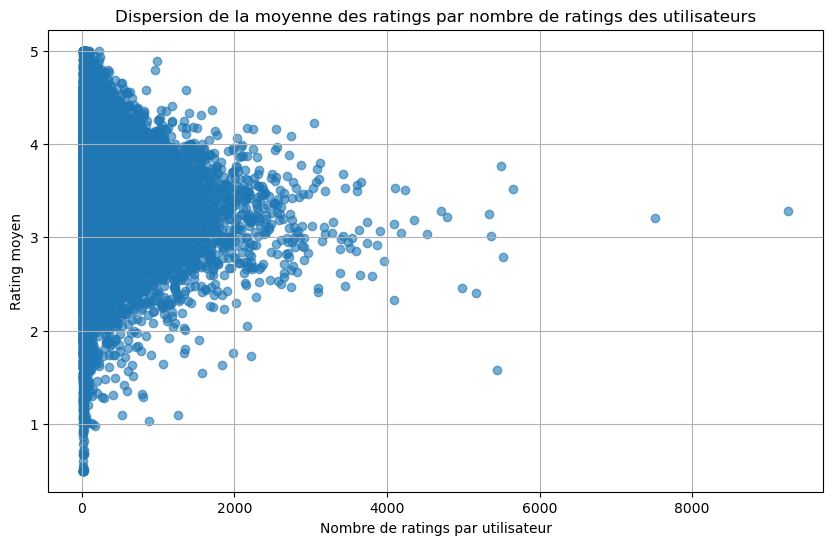

In [77]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links.groupby('userId').size()

# Calculer la moyenne des ratings par utilisateur
user_avg_ratings = ratings_movies_links.groupby('userId')['rating'].mean()

# Fusionner les deux séries pour obtenir un DataFrame
ratings_summary = pd.DataFrame({'num_ratings': user_ratings_count, 'avg_rating': user_avg_ratings})

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(ratings_summary['num_ratings'], ratings_summary['avg_rating'], alpha=0.6)
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Rating moyen')
plt.title('Dispersion de la moyenne des ratings par nombre de ratings des utilisateurs')
#plt.xlim(0, 200)  # Limiter l'axe X de 0 à 200
plt.grid(True)

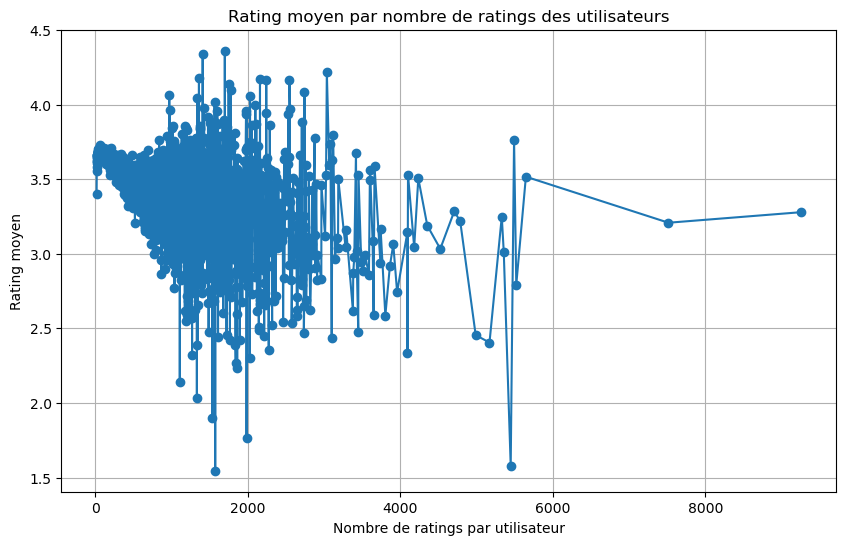

In [81]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links.groupby('userId').size()

# Calculer la moyenne des ratings par utilisateur
user_avg_ratings = ratings_movies_links.groupby('userId')['rating'].mean()

# Fusionner les deux séries pour obtenir un DataFrame
ratings_summary = pd.DataFrame({'num_ratings': user_ratings_count, 'avg_rating': user_avg_ratings})

# Grouper par nombre de ratings et calculer la moyenne des ratings pour chaque groupe
grouped_ratings_summary = ratings_summary.groupby('num_ratings')['avg_rating'].mean()

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(grouped_ratings_summary.index, grouped_ratings_summary.values, marker='o', linestyle='-')
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Rating moyen')
plt.title('Rating moyen par nombre de ratings des utilisateurs')
#plt.xlim(0, 200)  # Limiter l'axe X de 0 à 200
plt.grid(True)
plt.show()

In [34]:
# Obtenir le nombre d'imdbId uniques
ratings_movies_links['imdbId'].nunique()

26744

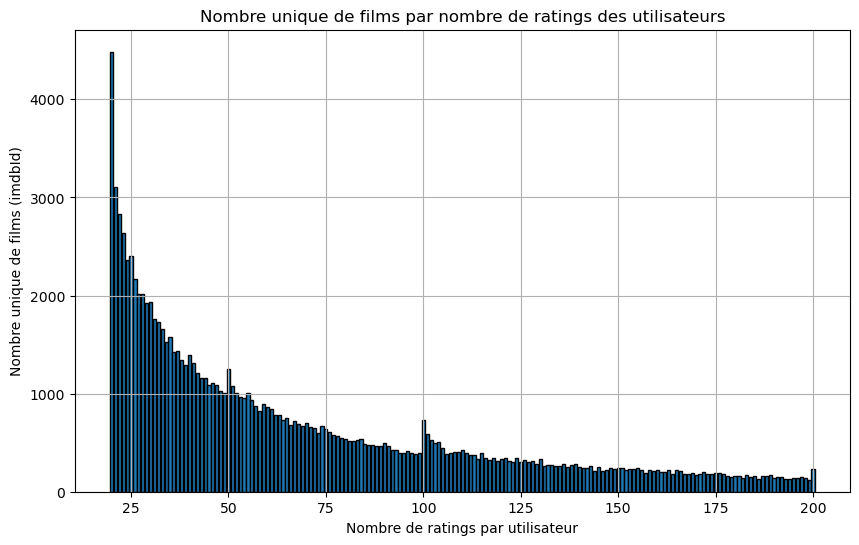

In [64]:
# Graphique qui compte les imdbId uniques par quantité de ratings

# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links.groupby('userId').size()

# Compter le nombre de films uniques (imdbId) pour chaque nombre de ratings par utilisateur
imdb_count_per_user_ratings = user_ratings_count.value_counts().sort_index()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(imdb_count_per_user_ratings.index[imdb_count_per_user_ratings.index <= 200], 
        imdb_count_per_user_ratings.values[imdb_count_per_user_ratings.index <= 200], edgecolor='black')

#plt.bar(imdb_count_per_user_ratings.index, imdb_count_per_user_ratings.values, edgecolor='black')
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Nombre unique de films (imdbId)')
plt.title('Nombre unique de films par nombre de ratings des utilisateurs')
plt.grid(True)
plt.show()

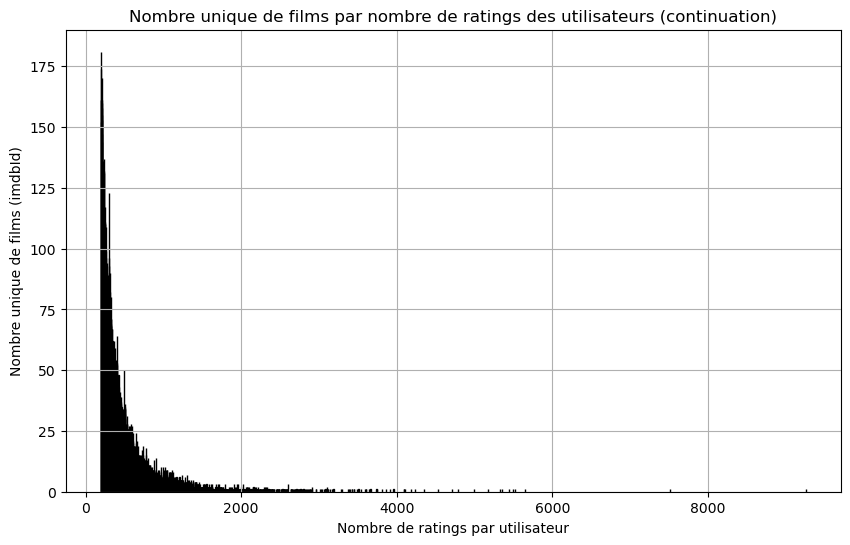

In [68]:
# Graphique qui compte les imdbId uniques par quantité de ratings (continuation)

# Compter le nombre de ratings par utilisateur
user_ratings_count = ratings_movies_links.groupby('userId').size()

# Compter le nombre de films uniques (imdbId) pour chaque nombre de ratings par utilisateur
imdb_count_per_user_ratings = user_ratings_count.value_counts().sort_index()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(imdb_count_per_user_ratings.index[imdb_count_per_user_ratings.index > 200], 
        imdb_count_per_user_ratings.values[imdb_count_per_user_ratings.index > 200], edgecolor='black')

#plt.bar(imdb_count_per_user_ratings.index, imdb_count_per_user_ratings.values, edgecolor='black')
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Nombre unique de films (imdbId)')
plt.title('Nombre unique de films par nombre de ratings des utilisateurs (continuation)')
plt.grid(True)
plt.show()

In [111]:
# Recherche de l'union des bases de données 
# Filtrer les lignes où title_name contient 'le nom du film cherché'
filtered_film = ratings_movies_links[ratings_movies_links['title_name'].str.contains('Jumanji', case=False, na=False)]

# Obtenir les valeurs uniques des colonnes spécifiées
filtered_film [['title_name', 'release_year', 'movieId', 'imdbId', 'tmdbId']].drop_duplicates()



,title_name,release_year,movieId,imdbId,tmdbId
0,Jumanji,1995,2,113497,8844.0


In [115]:
# Compter le nombre de caractères pour chaque imdbId
ratings_movies_links['imdbId_length'] = ratings_movies_links['imdbId'].astype(str).apply(len)

# Obtenir les longueurs uniques
unique_lengths = ratings_movies_links['imdbId_length'].unique()

# Afficher les longueurs uniques
print(f"Longueurs uniques des imdbId : {unique_lengths}")

# Afficher les longueurs uniques et leur fréquence
length_frequency = ratings_movies_links['imdbId_length'].value_counts()
print(f"Fréquence des différentes longueurs des imdbId :\n{length_frequency}")

Longueurs uniques des imdbId : [6 5 7 4 3 2 1]
Fréquence des différentes longueurs des imdbId :
imdbId_length
6    13292587
5     6083837
7      622127
4        1360
3         322
2          19
1          11
Name: count, dtype: int64


In [117]:
# Recherche de l'union des bases de données 
# Filtrer les lignes où title_name contient 'le nom du film cherché'
filtered_film = ratings_movies_links[ratings_movies_links['title_name'].str.contains('Toy Story', case=False, na=False)]

# Obtenir les valeurs uniques des colonnes spécifiées
filtered_film [['title_name', 'release_year', 'movieId', 'imdbId', 'tmdbId']].drop_duplicates()

,title_name,release_year,movieId,imdbId,tmdbId
236,Toy Story,1995,1,114709,862.0
1139,Toy Story 2,1999,3114,120363,863.0
8949,Toy Story 3,2010,78499,435761,10193.0
862134,Toy Story Toons: Hawaiian Vacation,2011,115875,1850374,77887.0
958872,Toy Story of Terror,2013,106022,2446040,213121.0
2134099,Toy Story That Time Forgot,2014,120474,3473654,256835.0
3949993,Toy Story Toons: Small Fry,2011,115879,2033372,82424.0
10842306,Toy Story Toons: Partysaurus Rex,2012,120468,2340678,130925.0
